# Nexa wall street columns high resolution (30 x 30), Ndata clustering scaling. 
In this book we test how the accuracy of the predictions for next letter and same letter change as a number of the Ndata clusters varies

In [1]:
import numpy as np
from sklearn import svm, cross_validation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("../")

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Same letter

#### Load the data

In [2]:
# Data to use
Ndata = 5000
Nside = 30

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // Nside
    targets.append(letters_sequence[letter_index])

# Transform to array
targets = np.array(targets)
print(list(enumerate(targets[0:40])))

[(0, 'p'), (1, 'p'), (2, 'p'), (3, 'p'), (4, 'p'), (5, 'p'), (6, 'p'), (7, 'p'), (8, 'p'), (9, 'p'), (10, 'p'), (11, 'p'), (12, 'p'), (13, 'p'), (14, 'p'), (15, 'p'), (16, 'p'), (17, 'p'), (18, 'p'), (19, 'p'), (20, 'p'), (21, 'p'), (22, 'p'), (23, 'p'), (24, 'p'), (25, 'p'), (26, 'p'), (27, 'p'), (28, 'p'), (29, 'p'), (30, 'i'), (31, 'i'), (32, 'i'), (33, 'i'), (34, 'i'), (35, 'i'), (36, 'i'), (37, 'i'), (38, 'i'), (39, 'i')]


In [3]:
# Calculate the predictions     

scores_mixed = []
scores_indp = []

Ntime_clusters_set = np.arange(10, 55, 5)
# Ntime_clusters_set = np.arange(10, 25, 5)

# Nexa parameters
max_lag = 10 
Nembedding = 3
Nspatial_clusters = max_lag

In [4]:
for Ntime_clusters in Ntime_clusters_set:
    
    print(Ntime_clusters)
    Nspatial_clusters = max_lag
    # Here calculate the scores for the mixes
    run_name = '/test'
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep'
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-distance'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


10
15
20
25
30
35
40
45
50


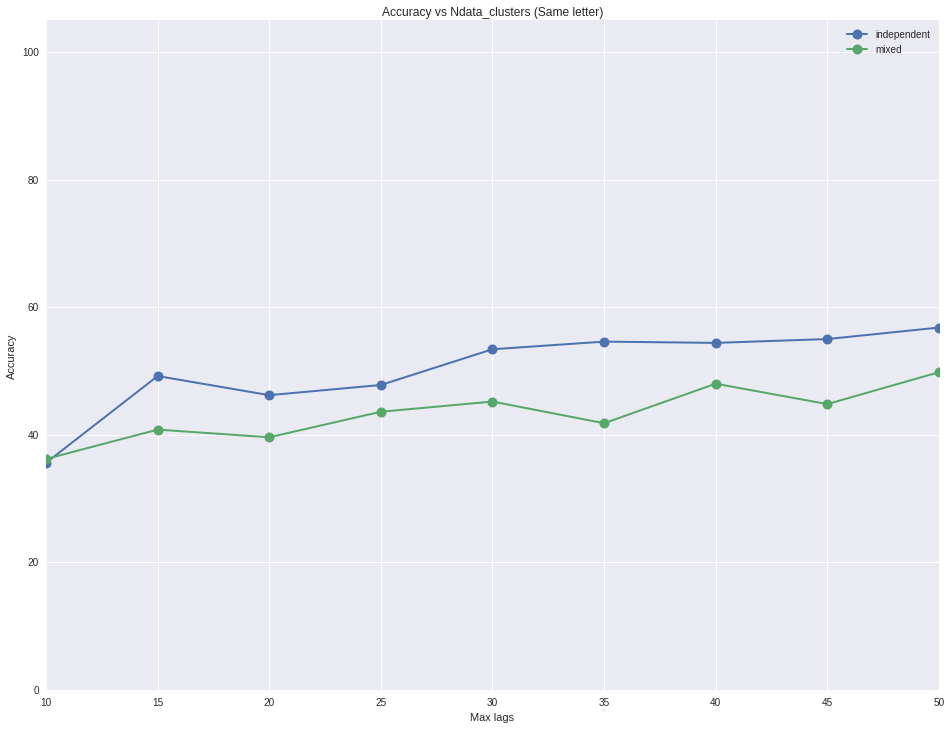

In [5]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ntime_clusters_set,scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(Ntime_clusters_set, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Ndata_clusters (Same letter)')
ax.legend()

## Next Letter

#### Load the data

In [6]:
# Data to use
Ndata = 5000
Nside = 30

# First we load the file 
file_location = '../results_database/text_wall_street_columns_30.hdf5'

# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters_30.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // Nside
    targets.append(letters_sequence[letter_index + 1])

# Transform to array
targets = np.array(targets)
print(list(enumerate(targets[0:40])))

[(0, 'i'), (1, 'i'), (2, 'i'), (3, 'i'), (4, 'i'), (5, 'i'), (6, 'i'), (7, 'i'), (8, 'i'), (9, 'i'), (10, 'i'), (11, 'i'), (12, 'i'), (13, 'i'), (14, 'i'), (15, 'i'), (16, 'i'), (17, 'i'), (18, 'i'), (19, 'i'), (20, 'i'), (21, 'i'), (22, 'i'), (23, 'i'), (24, 'i'), (25, 'i'), (26, 'i'), (27, 'i'), (28, 'i'), (29, 'i'), (30, 'e'), (31, 'e'), (32, 'e'), (33, 'e'), (34, 'e'), (35, 'e'), (36, 'e'), (37, 'e'), (38, 'e'), (39, 'e')]


#### Do the loop and calculate the estimations

In [7]:
# Calculate the predictions     

scores_mixed = []
scores_indp = []

Ntime_clusters_set = np.arange(10, 55, 5)
# Ntime_clusters_set = np.arange(10, 25, 5)

# Nexa parameters
max_lag = 10 
Nembedding = 3
Nspatial_clusters = max_lag

In [8]:
for Ntime_clusters in Ntime_clusters_set:
    
    print(Ntime_clusters)
    Nspatial_clusters = max_lag
    # Here calculate the scores for the mixes
    run_name = '/test'
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep'
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-distance'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = LinearDiscriminantAnalysis()
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


10
15
20
25
30
35
40
45
50


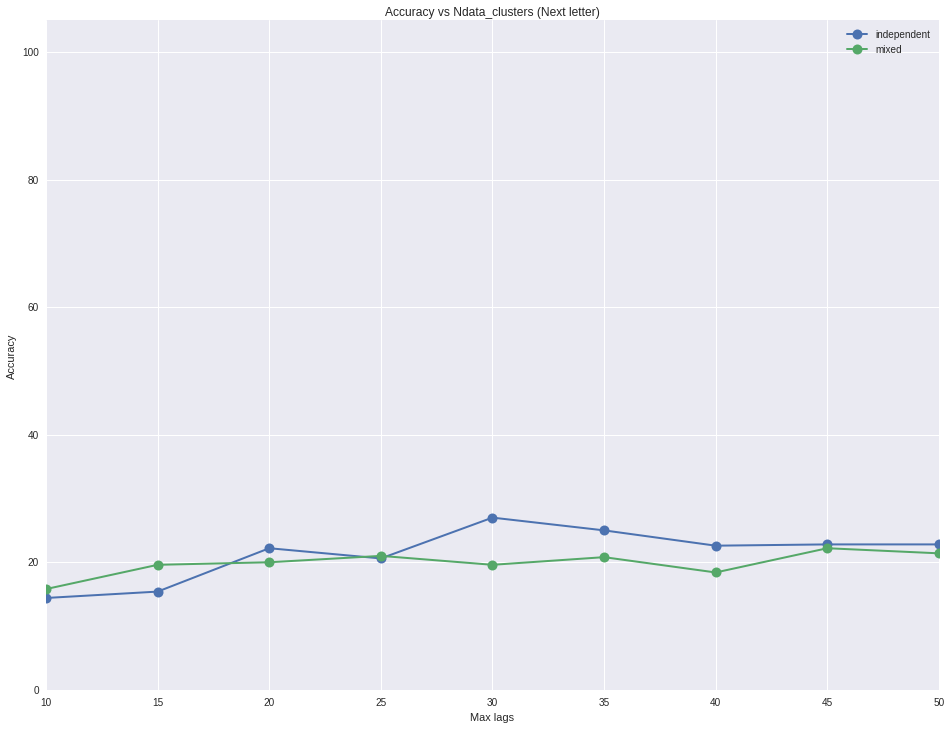

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ntime_clusters_set,scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(Ntime_clusters_set, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max lags')
ax.set_title('Accuracy vs Ndata_clusters (Next letter)')
ax.legend()